In [1]:
import numpy as np

In [2]:
# siniging, dancing, drawing

users = np.array([np.random.randint(0,2,3) for i in range(5)])
print(users)

[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 1]]


In [3]:
#import numpy as np
centroid = { 
    1: [0.5,0,0],
    2: [0,0.5,0],
    3: [0,0,0.5],
}
print(centroid)
#print(centroid.shape)

{1: [0.5, 0, 0], 2: [0, 0.5, 0], 3: [0, 0, 0.5]}


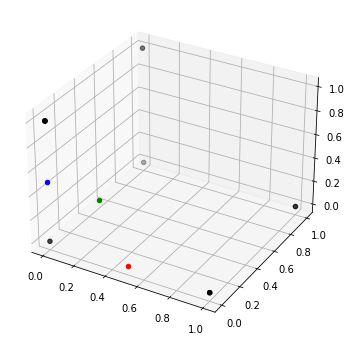

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.DataFrame({
    'singer':[0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'dancer':[1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    'funny' :[1, 1, 0, 1, 0, 0, 0, 0, 0, 1]
})

k=3

fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['singer'], df['dancer'], df['funny'], color='k')
colmap={1: 'r', 2: 'g', 3: 'b'}
for i in centroid.keys():
    ax.scatter(*centroid[i], color=colmap[i])
plt.show()

In [5]:
import numpy as np

## Assignment to Clusters

def k_means(df, centroid):
    for i in centroid.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['singer'] - centroid[i][0]) ** 2
                + (df['dancer'] - centroid[i][1]) ** 2
                + (df['funny'] - centroid[i][2]) **2
            )
        )
        centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroid.keys()]
        df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
        df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
        df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = k_means(df, centroid)
# print(df)

# fig = plt.figure(figsize=(6,6))
# ax=fig.add_subplot(111, projection='3d')
# ax.scatter(df['singer'], df['dancer'], df['funny'], alpha=0.5, edgecolor='k')
# for i in centroid.keys():
#     ax.scatter(*centroid[i], color=colmap[i])
# plt.show()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['distance_from_2', 'distance_from_3'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"